<a href="https://colab.research.google.com/github/jenaroaaugusto/IC2/blob/master/NewCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
tf.__version__

'2.2.0-rc2'

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt




In [3]:
!git clone https://github.com/jenaroaaugusto/Dataset_musica_semvalidacao.git

Cloning into 'Dataset_musica_semvalidacao'...
remote: Enumerating objects: 4113, done.
remote: Counting objects: 100% (4113/4113), done.
remote: Compressing objects: 100% (2690/2690), done.
remote: Total 4113 (delta 1421), reused 4113 (delta 1421), pack-reused 0
Receiving objects: 100% (4113/4113), 1.44 MiB | 13.93 MiB/s, done.
Resolving deltas: 100% (1421/1421), done.


In [4]:
!git clone https://github.com/jenaroaaugusto/HOMUS.git

Cloning into 'HOMUS'...
remote: Enumerating objects: 30543, done.
remote: Counting objects: 100% (30543/30543), done.
remote: Compressing objects: 100% (30448/30448), done.
remote: Total 30543 (delta 85), reused 30537 (delta 83), pack-reused 0
Receiving objects: 100% (30543/30543), 10.62 MiB | 21.37 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Checking out files: 100% (33200/33200), done.


In [0]:
trainDir = os.path.join('/content/Dataset_musica_semvalidacao', 'Treinamento')
validationDir=os.path.join('/content/Dataset_musica_semvalidacao', 'Teste')
testDir= os.path.join('/content/HOMUS/','Dataset-Teste')


In [6]:
train_dir = pathlib.Path(""+trainDir)
print(train_dir)
total_train = len(list(train_dir.glob('*/*.bmp')))
print(total_train)
CLASS_NAMES=np.array(os.listdir(train_dir))
print(CLASS_NAMES)

/content/Dataset_musica_semvalidacao/Treinamento
3393
['ACCIDENTAL_Flat' 'Sharp' 'Alto' 'Trebble' 'Natural' 'Bass' 'DoubSharp']


In [7]:
validation_dir = pathlib.Path(""+validationDir)
print(validation_dir)
total_val = len(list(validation_dir.glob('*/*.bmp')))
print(total_val)

/content/Dataset_musica_semvalidacao/Teste
700


In [8]:
test_dir = pathlib.Path(""+testDir)
print(test_dir)
total_test = len(list(test_dir.glob('*/*.png')))
print(total_test)
CLASS_NAMEST=np.array(os.listdir(test_dir))
print(CLASS_NAMEST)

/content/HOMUS/Dataset-Teste
2799
['ACCIDENTAL_Flat' 'Sharp' 'Alto' 'Trebble' 'Natural' 'Bass' 'DoubSharp']


In [0]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 28
IMG_WIDTH = 28


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
test_image_generator = ImageDataGenerator(rescale=1./255)


In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")


Found 3393 images belonging to 7 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=False,
                                                              color_mode="grayscale",
                                                              class_mode="categorical")


Found 700 images belonging to 7 classes.


In [13]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=False,
                                                              color_mode="grayscale",
                                                              class_mode="categorical")

Found 2799 images belonging to 7 classes.


In [14]:
train_data_gen.class_indices

{'ACCIDENTAL_Flat': 0,
 'Alto': 1,
 'Bass': 2,
 'DoubSharp': 3,
 'Natural': 4,
 'Sharp': 5,
 'Trebble': 6}

In [15]:
test_data_gen.class_indices

{'ACCIDENTAL_Flat': 0,
 'Alto': 1,
 'Bass': 2,
 'DoubSharp': 3,
 'Natural': 4,
 'Sharp': 5,
 'Trebble': 6}

In [0]:
x,y=next(train_data_gen)


In [17]:
fy=np.argmax(y[1])
fy

4

In [0]:
ax=train_data_gen.class_indices

In [19]:
ax.keys()

dict_keys(['ACCIDENTAL_Flat', 'Alto', 'Bass', 'DoubSharp', 'Natural', 'Sharp', 'Trebble'])

In [20]:
train_data_gen.num_classes

7

In [21]:
val_data_gen.num_classes

7

In [22]:
test_data_gen.num_classes

7

In [23]:
len(train_data_gen.labels)

3393

# Rede Neural Convolucional - CNN  

In [0]:
from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.layers import Activation, Dense
# from keras import 

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2),padding="same", activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
Total params: 92,512
Trainable params: 92,512
Non-trainable params: 0
____________________________________________________

In [26]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [0]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


In [0]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=METRICS)


In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [30]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
106/106 [==============================] - 8s 72ms/step - loss: 0.8143 - tp: 1871.0000 - fp: 172.0000 - tn: 19994.0000 - fn: 1490.0000 - accuracy: 0.9294 - precision: 0.9158 - recall: 0.5567 - auc: 0.9451 - val_loss: 0.1443 - val_tp: 639.0000 - val_fp: 22.0000 - val_tn: 4010.0000 - val_fn: 33.0000 - val_accuracy: 0.9883 - val_precision: 0.9667 - val_recall: 0.9509 - val_auc: 0.9980
Epoch 2/15
106/106 [==============================] - 7s 66ms/step - loss: 0.1137 - tp: 3255.0000 - fp: 102.0000 - tn: 20250.0000 - fn: 137.0000 - accuracy: 0.9899 - precision: 0.9696 - recall: 0.9596 - auc: 0.9981 - val_loss: 0.0424 - val_tp: 662.0000 - val_fp: 5.0000 - val_tn: 4027.0000 - val_fn: 10.0000 - val_accuracy: 0.9968 - val_precision: 0.9925 - val_recall: 0.9851 - val_auc: 0.9998
Epoch 3/15
106/106 [==============================] - 7s 66ms/step - loss: 0.0645 - tp: 3279.0000 - fp: 63.0000 - tn: 20103.0000 - fn: 82.0000 - accuracy: 0.9938 - precision: 0.9811 - recall: 0.9756 - auc: 0.99

In [0]:
model.save_weights('Teste19.h5') 
model.save("modelo7.h5")

# Resultados visualizar 

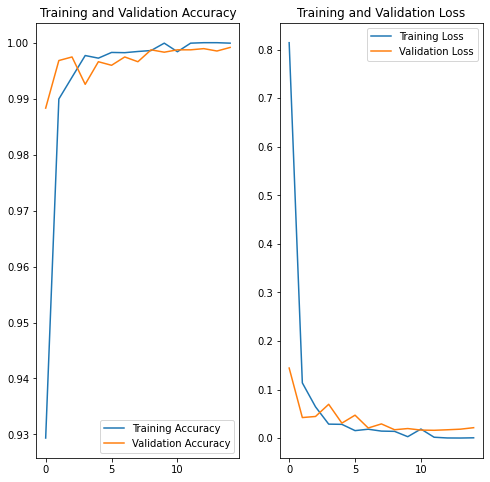

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Aumento de exemplos e redução de Overfiting 

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [34]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 3393 images belonging to 7 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [37]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 3393 images belonging to 7 classes.


In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [39]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 3393 images belonging to 7 classes.


In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [41]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode="grayscale",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="categorical")

Found 3393 images belonging to 7 classes.


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [43]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                  directory=validation_dir,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  shuffle=False,
                                                  color_mode="grayscale",
                                                  class_mode="categorical")

Found 700 images belonging to 7 classes.


#Nova CNN

In [70]:
model_new = models.Sequential()
model_new.add(layers.Conv2D(32, (2, 2),padding="same", activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Dropout(0.2))
model_new.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model_new.add(layers.MaxPooling2D((2, 2)))
model_new.add(layers.Conv2D(128, (3, 3),padding="same", activation='relu'))
model_new.add(layers.MaxPooling2D(2,2))
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)        

In [71]:
model_new.add(layers.Flatten())
model_new.add(layers.Dropout(0.1))
model_new.add(layers.Dense(128, activation='relu'))
model_new.add(layers.Dense(64,activation='relu'))
model_new.add(layers.Dense(10, activation='relu'))
model_new.add(Dense(7))
model_new.add(Activation('softmax'))
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)        

In [72]:
model_new.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=METRICS)
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)        

In [73]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
106/106 [==============================] - 9s 80ms/step - loss: 1.8520 - tp: 634.0000 - fp: 34.0000 - tn: 24164.0000 - fn: 3399.0000 - accuracy: 0.8784 - precision: 0.9491 - recall: 0.1572 - auc: 0.7437 - val_loss: 1.5198 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 4008.0000 - val_fn: 668.0000 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7918
Epoch 2/15
106/106 [==============================] - 8s 75ms/step - loss: 1.5520 - tp: 166.0000 - fp: 97.0000 - tn: 20069.0000 - fn: 3195.0000 - accuracy: 0.8601 - precision: 0.6312 - recall: 0.0494 - auc: 0.7831 - val_loss: 1.1590 - val_tp: 150.0000 - val_fp: 55.0000 - val_tn: 3953.0000 - val_fn: 518.0000 - val_accuracy: 0.8775 - val_precision: 0.7317 - val_recall: 0.2246 - val_auc: 0.8879
Epoch 3/15
106/106 [==============================] - 8s 73ms/step - loss: 1.2065 - tp: 1132.0000 - fp: 500.0000 - tn: 19666.0000 - fn: 2229.0000 - accuracy: 0.8840 - precision: 0.6936 - recall: 0.

In [0]:
model_new.save_weights('Teste22.h5') 
model_new.save("modelo10.h5")

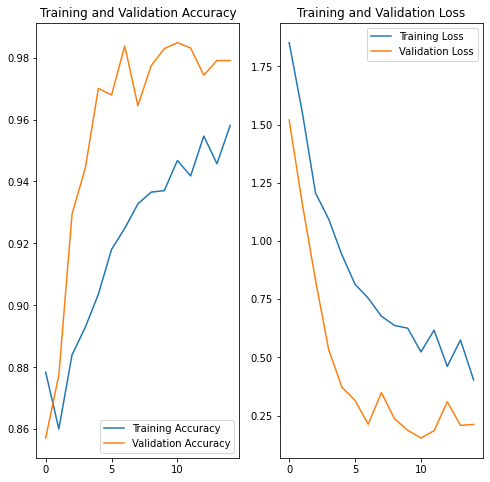

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
nb=len(val_data_gen.filenames)

In [0]:
result=model_new.predict_generator(val_data_gen,steps=np.ceil(nb/batch_size))

In [0]:
true_labels =val_data_gen.classes

In [0]:
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in result])

In [81]:
y_true.shape

(700,)

In [82]:
y_pred.shape

(700,)

In [0]:
 axy=test_data_gen.class_indices

In [0]:
names=list(axy.keys())

In [0]:
nomedasclasses = np.array(names)


In [86]:
print(nomedasclasses)

['ACCIDENTAL_Flat' 'Alto' 'Bass' 'DoubSharp' 'Natural' 'Sharp' 'Trebble']


In [0]:
import seaborn as sns

import pandas as pd

In [88]:
val_data_gen.class_indices

{'ACCIDENTAL_Flat': 0,
 'Alto': 1,
 'Bass': 2,
 'DoubSharp': 3,
 'Natural': 4,
 'Sharp': 5,
 'Trebble': 6}

In [89]:
tf.math.confusion_matrix(y_true,y_pred)

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[56, 30,  0,  0, 12,  0,  2],
       [ 0, 66, 32,  0,  1,  1,  0],
       [ 0,  1, 66, 32,  1,  0,  0],
       [ 0,  0,  0, 68, 32,  0,  0],
       [ 2,  0,  0,  0, 70, 28,  0],
       [ 1,  0,  0,  0,  7, 63, 29],
       [32, 15,  0,  0,  3,  0, 50]], dtype=int32)>

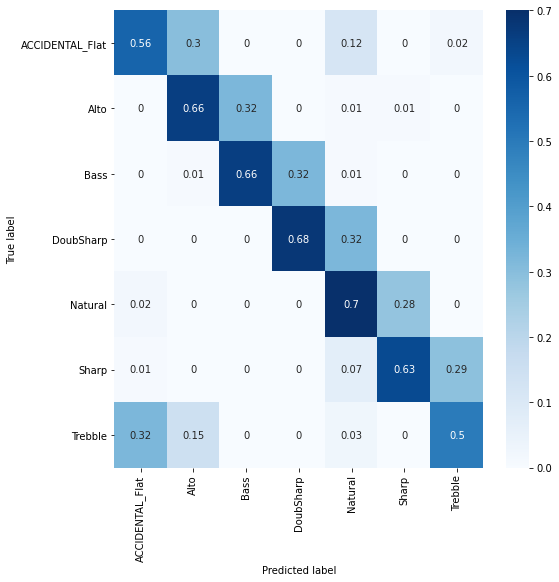

In [90]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Sklearn

In [0]:
import sklearn
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_true, y_pred)

In [93]:
cm

array([[56, 30,  0,  0, 12,  0,  2],
       [ 0, 66, 32,  0,  1,  1,  0],
       [ 0,  1, 66, 32,  1,  0,  0],
       [ 0,  0,  0, 68, 32,  0,  0],
       [ 2,  0,  0,  0, 70, 28,  0],
       [ 1,  0,  0,  0,  7, 63, 29],
       [32, 15,  0,  0,  3,  0, 50]])

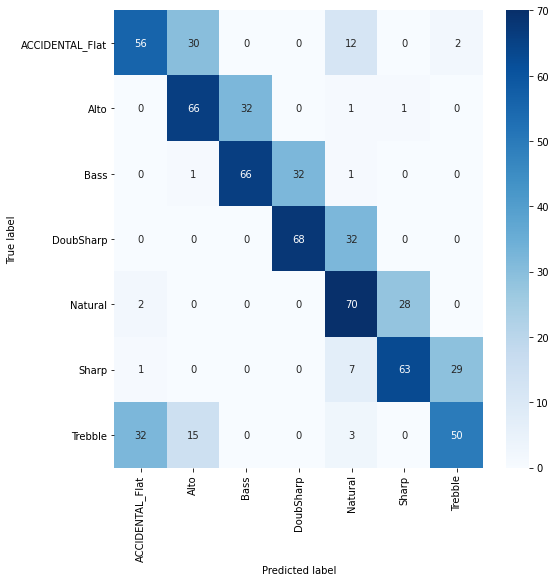

In [94]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat,
                     index = nomedasclasses, 
                     columns = nomedasclasses)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()